In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('data/Social_Network_Ads.csv')
features = data.iloc[:,2:-1].values
goal = data.iloc[:,-1].values
pd.DataFrame(features)

,0,1
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
5,27,58000
6,27,84000
7,32,150000
8,25,33000
9,35,65000


In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features = scaler.fit_transform(features)

E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [4]:
from sklearn.model_selection import train_test_split
train_set,test_set,goal_train,goal_test = train_test_split(features,goal,test_size = 0.2,random_state = 0)

In [5]:
from sklearn.svm import SVC
class1 = SVC(kernel = 'linear',random_state = 0)
class1.fit(train_set,goal_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [6]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(goal_test,class1.predict(test_set))
pd.DataFrame(cm)

,0,1
0,57,1
1,6,16


In [7]:
class1.score(test_set,goal_test)

0.9125

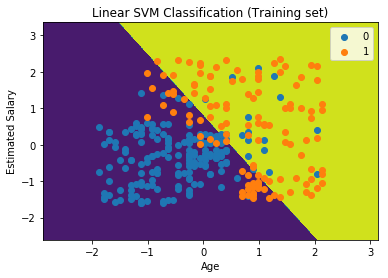

In [16]:
from matplotlib.colors import ListedColormap
x_set,y_set = train_set, goal_train
x1,x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1,stop = x_set[:,0].max()+1,step = 0.01 ),
                    np.arange(start = x_set[:,1].min() - 1,stop = x_set[:,1].max()+1,step = 0.01 ) )
plt.contourf(x1,x2,class1.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], label = j)
plt.title('Linear SVM Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()